In [67]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
No module named 'torch'

In [55]:
data_book = pd.read_csv('book_reviews_sample.csv')

In [56]:
data_book['reviewText_clean'] = data_book.apply(lambda x: re.sub(r'[^\w\s]', "" , x['reviewText']).lower(), axis=1)
data_book.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [57]:
vader = SentimentIntensityAnalyzer()

In [58]:
data_book['vader_sentiment_score'] = data_book['reviewText_clean'].apply(lambda review: vader.polarity_scores(review)['compound'])
data_book.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [59]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data_book['vader_sentiment_label'] = pd.cut(data_book['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

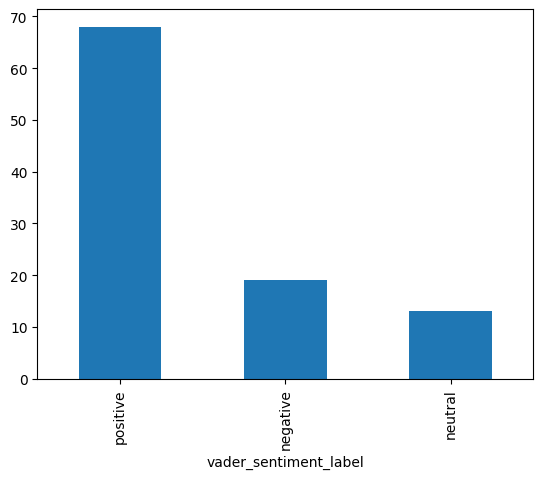

In [60]:
data_book['vader_sentiment_label'].value_counts().plot.bar()